<a href="https://colab.research.google.com/github/elysethulin/PRACTICE/blob/master/Decision_Trees_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees and Random Forest

Outline:
1. Decision tree model example
2. Random forest model example
3. Hyperparameter tuning

In [ ]:
# Imports

import pandas as pd
import numpy as np

# Entropy
from scipy.stats import entropy

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Machine Learning Imports
from sklearn import metrics         # Evaluation model performance (accuracy, precision, etc.)
from sklearn import model_selection # Cross validation, hyperparameter tuning, etc.
from sklearn import tree            # Decision Tree model
from sklearn import ensemble        # Random Forest model

# Decision Trees

This section trains a decision tree to detect cancerous tumors based on approximately 30 fratures or measurements taken from the tumor cells.

## Wisconsin Breast Cancer Dataset
The **Wisconsin Breast Cancer Dataset** contains ~600 samples of 30 measurements taken from tumors. Using this data, we aim to classify or predict whether a tumor is malignant or benign.

Reference of dataset:

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [ ]:
# LOAD CANCER 1 of 2
cancer_dataset = pd.read_csv('https://raw.githubusercontent.com/Jpickard1/MIDASBioMedBootCamp/main/Session_15/decision_trees/data/wbc.csv')
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Display features of the data set
cancer_dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
cancer_dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
cancer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Data Cleaning

The `ID` and `Unnamed: 32` attributes is irrelevant and needs to be removed. Also, the `diagnosis` label needs to map to a binary vector of `0` and `1` rather than `B` and `M`.

In [ ]:
# LOAD CANCER 2 of 2
# Split data, labels, and remove irrelevant features
X_cancer = cancer_dataset.drop(['Unnamed: 32', 'diagnosis', 'id'], axis=1)
y_cancer = cancer_dataset['diagnosis'].map({'M':1, 'B':0}).to_numpy()

## Decision Tree Example

Using the `X_cancer_2D` data we will train a decision tree to classify the samples. This process is very similar to previous examples with regression or naive bayes models.

In [ ]:
# Extract 2D data to train a decision tree model
X_cancer_2D = X_cancer.to_numpy() #[['concavity_se', 'fractal_dimension_mean']]

#print(X_cancer_2D.head)
#sns.pairplot(X_cancer_2D)
#X_cancer_2D = X_cancer_2D.to_numpy()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_cancer_2D, y_cancer, test_size=0.2, random_state=0)

### Build and Fit the Decision Tree

In [ ]:
# Build and train a decision tree
decision_tree_model = tree.DecisionTreeClassifier(max_depth=4)

# Fit the model to training data
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
# Make predictions and evaluate model
y_pred_test = decision_tree_model.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred_test)

y_pred_train = decision_tree_model.predict(X_train)
train_accuracy = metrics.accuracy_score(y_train, y_pred_train)

print('Test Accuracy:', test_accuracy)
print('Train Accuracy:', train_accuracy)

Test Accuracy: 0.956140350877193
Train Accuracy: 0.9846153846153847


It is expected that the model performs better on the training data than the test data. However, it is suspicious that the model has perfect accuracy on the training data. This suggest that our model may be overfit to our data. Let's exampine the model to see what we can figure out.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


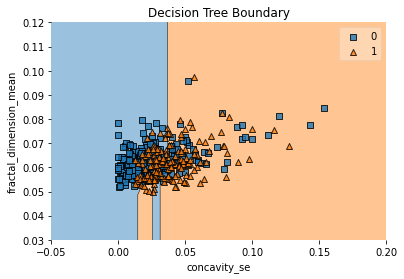

In [ ]:
plot_decision_regions(X_train, y_train, clf = decision_tree_model)
plt.xlim([-0.05, 0.2])
plt.ylim([0.03, 0.12])
plt.xlabel('concavity_se')
plt.ylabel('fractal_dimension_mean')
plt.title('Decision Tree Boundary')
plt.show()

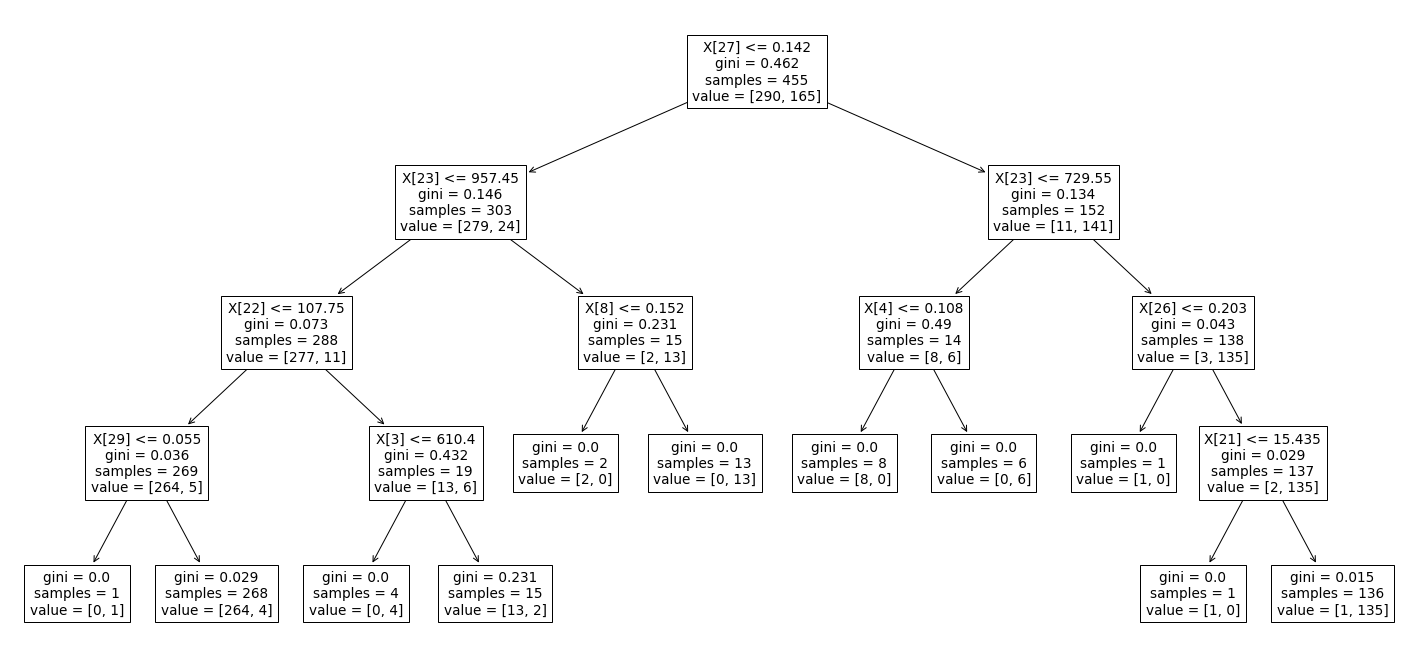

In [ ]:
fig = plt.figure(figsize=(25,12))
_ = tree.plot_tree(decision_tree_model)

# Random Forests

In this section, we will explore a new data set and apply a random forest model.


## Heart Disease Dataset

In [ ]:
# LOAD HEART 1 of 2
# Load the data set
heart_df = pd.read_csv('https://raw.githubusercontent.com/Jpickard1/MIDASBioMedBootCamp/main/Session_15/random_forest/data/heart.csv', index_col=0)

In [ ]:
# Shows a few rows of the data set
heart_df.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_df.describe()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 63 to 57
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       303 non-null    int64  
 1   cp        303 non-null    int64  
 2   trestbps  303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 33.1 KB


In [ ]:
# LOAD HEART 2 of 2
X_heart = heart_df.drop('target',1)
y_heart = heart_df['target']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_heart.to_numpy(), y_heart.to_numpy(), test_size=0.3, random_state=2)

## Random Forest Example

In [ ]:
# Build the model
RF_model = ensemble.RandomForestClassifier(n_estimators= 100, criterion='entropy', max_depth=3, random_state=0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
# Make Predictions
y_pred_test = RF_model.predict(X_test)
y_pred_train = RF_model.predict(X_train)

test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
train_accuracy = metrics.accuracy_score(y_train, y_pred_train)

print('Test Accuracy:', test_accuracy)
print('Train Accuracy:', train_accuracy)

Test Accuracy: 0.9120879120879121
Train Accuracy: 0.8632075471698113


Again, it seems our model may be overfit to our data. The below code examines the random forest model we created, and an individual tree in the random forest ensemble.

In [ ]:
print(RF_model.n_estimators)

100


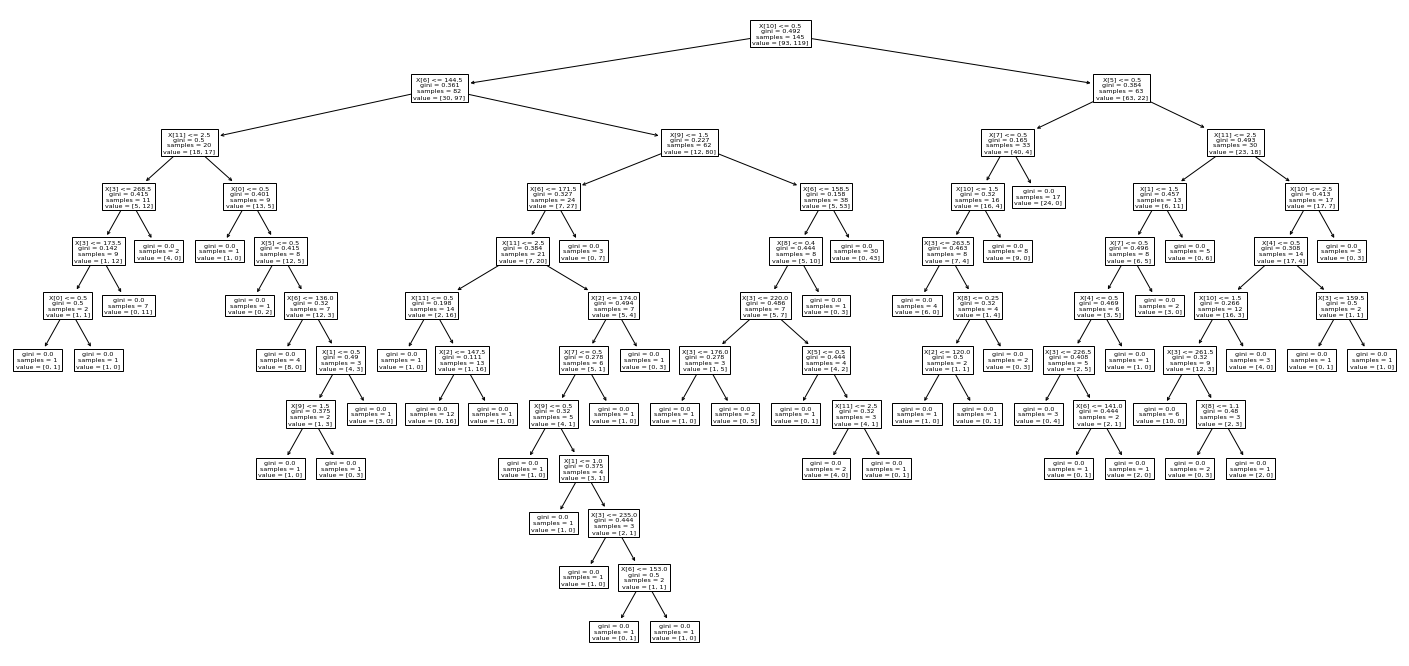

In [ ]:
fig = plt.figure(figsize=(25, 12))
_ = tree.plot_tree(RF_model.estimators_[2])

This tree is to big and so is the entire forest. We must cut down some of the forest by pruning each decisiont tree and changing the number of trees in our model. We can use the following parameters when we create a random forest model above: `n_estimators`, `criterion`, `max_depth`, and `min_samples_split` many others to change how our model is trained. For example, try the following arguments: 

`n_estimators= 100, criterion='entropy', max_depth=3`


# Information Theory

We can choose either data set to work with for the remainder of this notebook by repeating the code we ran to load it in. We will use the data we select now for the remainder of the notebook.

In the below code, we compute the entropy of each feature in our data set.

In [ ]:
# Run only this cell or the below
X = X_cancer
y = y_cancer

In [ ]:
# Run only this cell or the above
X = X_heart
y = y_heart

In [ ]:
# Verify your data loaded correctly
X.head

<bound method NDFrame.head of      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_

In [ ]:
# Do NOT change the random state
X_train, X_test, y_train, y_test = model_selection.train_test_split(X.to_numpy(), y, test_size=0.3, random_state=0)

[5.956117211494057, 5.963185128541836, 5.952706772501074, 5.856078820466444, 5.976102970432891, 5.875178546009778, 5.632749973874306, 5.694680099755996, 5.974715066125258, 5.98069592316472, 5.7976700386269, 5.892855083488794, 5.79588211433934, 5.587588812251521, 5.91318762968918, 5.794187442693082, 5.70299960357492, 5.865583299763772, 5.917619264115117, 5.814490506086868, 5.943916709549856, 5.9581494106978194, 5.939401385512819, 5.804546097994109, 5.971600812138407, 5.8212704355807094, 5.723878825683028, 5.8172304955139, 5.964028588692841, 5.965431527258543]
Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


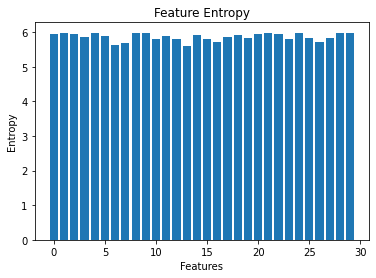

In [ ]:
ent = []
for i in range(len(X_train[0])):
  ent.append(entropy(X_train[:,i]))
print(ent)
print(X_heart.columns)
plt.bar(np.arange(len(X_train[0])), np.array(ent))
plt.xlabel('Features')
plt.ylabel('Entropy')
plt.title('Feature Entropy')
plt.show()

# Model Building

Using the selected data, we will build, train, and validate our models below. In this section, we will use cross validation to identify the best set of hyperparameters

In [ ]:
# When building a model, we should aim to optimize the model's performance on a specific metric.
# This lists all acceptable metrics
print(sorted(metrics.SCORERS.keys()))
met = 'f1'

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


In [ ]:
# Parameters for Random Forest
RF_max_depths = [2, 3, 4, 5, 8, 12]
RF_num_classifiers = [20, 50, 100, 150, 300]
RF_criterions = ['gini', 'entropy']

RF_scores_mean = np.zeros((len(RF_max_depths), len(RF_num_classifiers), len(RF_criterions)))
RF_scores_std = np.zeros((len(RF_max_depths), len(RF_num_classifiers), len(RF_criterions)))
print(RF_scores_mean.shape)

(6, 5, 2)


In [ ]:
# Parameters for Decision Trees
DT_max_depths = [2, 4, 6, 10, 15, 200]
DT_criterions = ['gini', 'entropy']

DT_scores_mean = np.zeros((len(DT_max_depths), len(DT_criterions)))
DT_scores_std = np.zeros((len(DT_max_depths), len(DT_criterions)))
print(DT_scores_mean.shape)

(6, 2)


In [ ]:
# Random Forest parameter tuning
n_folds = 10
for m in range(len(RF_max_depths)):
  for n in range(len(RF_num_classifiers)):
    for c in range(len(RF_criterions)):
      # Create a Random Forest model
      RF_model = ensemble.RandomForestClassifier(n_estimators=RF_num_classifiers[n], max_depth=RF_max_depths[m], criterion=RF_criterions[c])

      # Cross validation
      RF_score = model_selection.cross_val_score(estimator=RF_model, X=X_train, y=y_train, cv=n_folds, scoring=met)

      # Save the results
      RF_scores_mean[m, n, c] = np.mean(RF_score)
      RF_scores_std[m, n, c] = np.std(RF_score)

      # Print output
      print(str(RF_max_depths[m]) + '\t' + str(RF_num_classifiers[n]) + '\t' + str(RF_criterions[c]) + '\t' + str(np.mean(RF_score)) + '\t' + str(np.std(RF_score)))

m, n, c = np.unravel_index(np.argmax(RF_scores_mean, axis=None), RF_scores_mean.shape)
print('Best params:', RF_max_depths[m], RF_num_classifiers[n], RF_criterions[c])
best_RF = ensemble.RandomForestClassifier(n_estimators=RF_num_classifiers[n], max_depth=RF_max_depths[m], criterion=RF_criterions[c])

In [ ]:
# Decision trees
n_folds = 3
for m in range(len(DT_max_depths)):
  for c in range(len(DT_criterions)):
    # Create a Random Forest model
    DT_model = tree.DecisionTreeClassifier(max_depth=DT_max_depths[m], criterion=DT_criterions[c])

    # Cross validation
    DT_score = model_selection.cross_val_score(estimator=DT_model, X=X_train, y=y_train, cv=n_folds, scoring=met)

    # Save the results
    DT_scores_mean[m, c] = np.mean(DT_score)
    DT_scores_std[m, c] = np.std(DT_score)

    # Print output
    print(str(DT_max_depths[m]) + '\t' + str(DT_criterions[c]) + '\t' + str(np.mean(DT_score)) + '\t' + str(np.std(DT_score)))

m, c = np.unravel_index(np.argmax(DT_scores_mean, axis=None), DT_scores_mean.shape)
print('Best params:', DT_max_depths[m], DT_criterions[c])
best_DT = tree.DecisionTreeClassifier(max_depth=DT_max_depths[m], criterion=DT_criterions[c])



## Evaluate Our Models

We have now explored and filtered our data, built various types of models, performed 2 sets of hyperparameter tuning based on cross validation, and selected the optimal models.

The final step is to test our models on the test data to validate if our tuned models work as expected. In the below cells, we fit our models to our entire set of training data, and test them on the remaining test data

In [ ]:
best_DT.fit(X_train, y_train) # Fit the Decision Tree

In [ ]:
best_RF.fit(X_train, y_train) # Fit the Random Forest

In [ ]:
DT_y_pred = best_DT.predict(X_test) # Predict with decision tree
met_score = metrics.accuracy_score(y_test, DT_y_pred)
print(met_score)

In [ ]:
RF_y_pred = best_RF.predict(X_test) # Predict with decision tree
met_score = metrics.accuracy_score(y_test, RF_y_pred)
print(met_score)